# The Sparks Foundation - Data Science & Business Analytics Internship


### Batch  : May 2022

### Name  : Anushree K

### Task 4 : Exploratory Data Analysis - Terrorism

### Level : Intermediate

* Perform Exploratory Data Analysis on  dataset "Global Terrorism"

*  As a security/ defense analyst.try to find out the hot zone of terrorism

* Suggest teams or players a company should endorse for its products

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations


__Data__  : https://bit.ly/2TK5Xn5

###  Importing the necessary libraries for the task :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Renaming columns for easy understanding
data.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
data.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# Deleting the unnecessary columns
data= data[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
            'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type',
            'Motive']]
data.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
data.shape

(181691, 19)

The dataset is a huge dataset with around 1 L data points and 29 columns.

In [8]:
# Analyzing the datatypes of the objects
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [9]:
# Analyzing the numerical attributes 
data.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [10]:
# Checking the number of columns present
data.columns

Index(['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region',
       'City', 'Latitude', 'Longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [11]:
# Looking for the NULL values
data.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [12]:
# Analyzing the unique values for each of the datatypes
data.nunique()

Year               47
Month              13
Extended            2
Day                32
Country           205
State            2855
Region             12
City            36674
Latitude        48322
Longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

## Data Visualization

In [13]:
# Identifying Countries that have been most attacked 
data.Country.value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

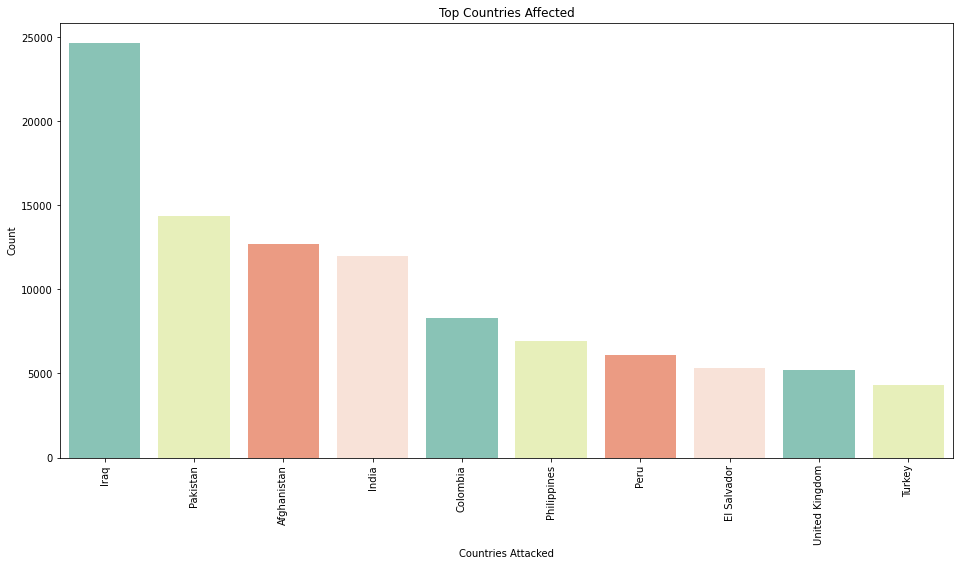

In [14]:
# Visualizing the top 10 attacked countries
plt.figure(figsize = (16,8))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette=["#7fcdbb","#edf8b1","#fc9272", "#fee0d2"])
plt.title('Top Countries Affected')
plt.xlabel('Countries Attacked')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### __IRAQ__ is the country where maximum number of terror attacks have taken place



In [15]:
# Identifying the states with the most number of terrorism attacks
data.State.value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

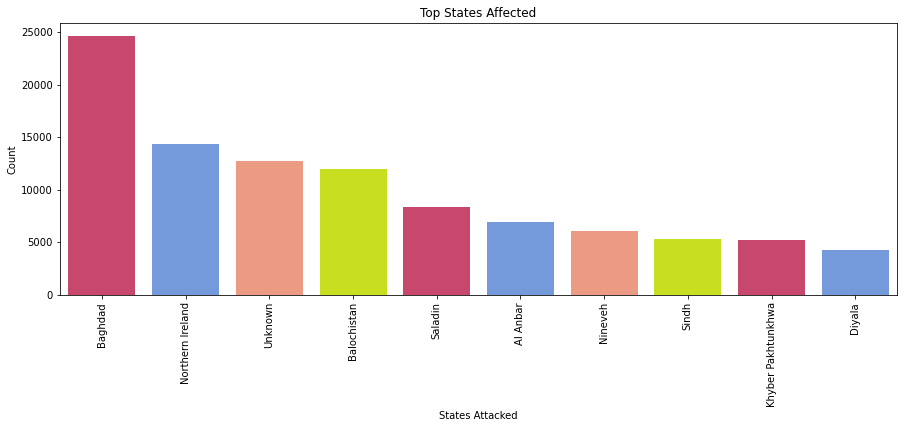

In [16]:
# Visualizing the top 10 attacked states
plt.figure(figsize = (15,5))
sns.barplot(data['State'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette=["#de3163","#6495ed","#fc9272", "#DFFF00"])
plt.title('Top States Affected')
plt.xlabel('States Attacked')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### __BAGHDAD__ is the most attacked location across all states.

In [17]:
# Year with the most number of terror attacks
data.Year.value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

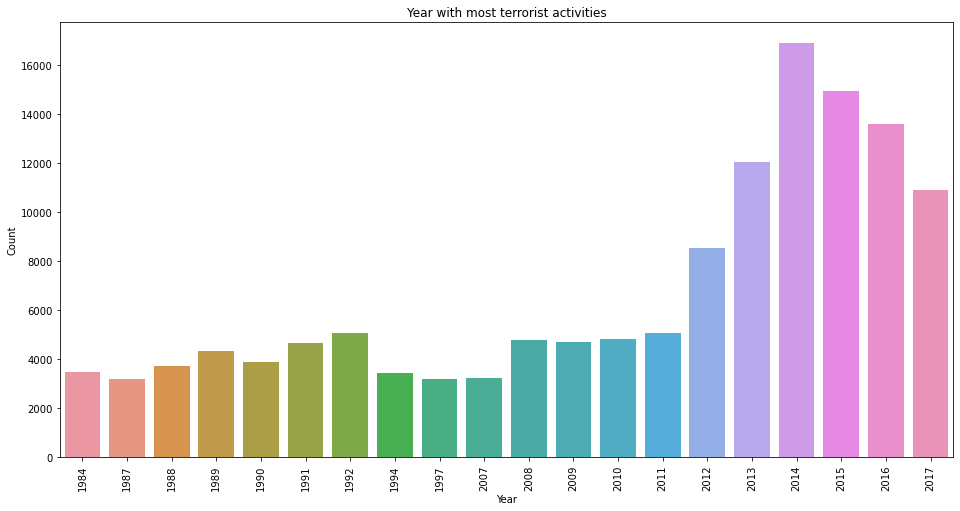

In [18]:
# Visualzing the  Top 20 years with maximum attacks
plt.figure(figsize = (16,8))
sns.barplot(data['Year'].value_counts()[:20].index,data['Year'].value_counts()[:20].values)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### 2014 has been the year where maximum attacks have taken place worldwide.

In [19]:
# Most Popular Weapon Type/Kind used
data.Weapon_type.value_counts().head(10)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64

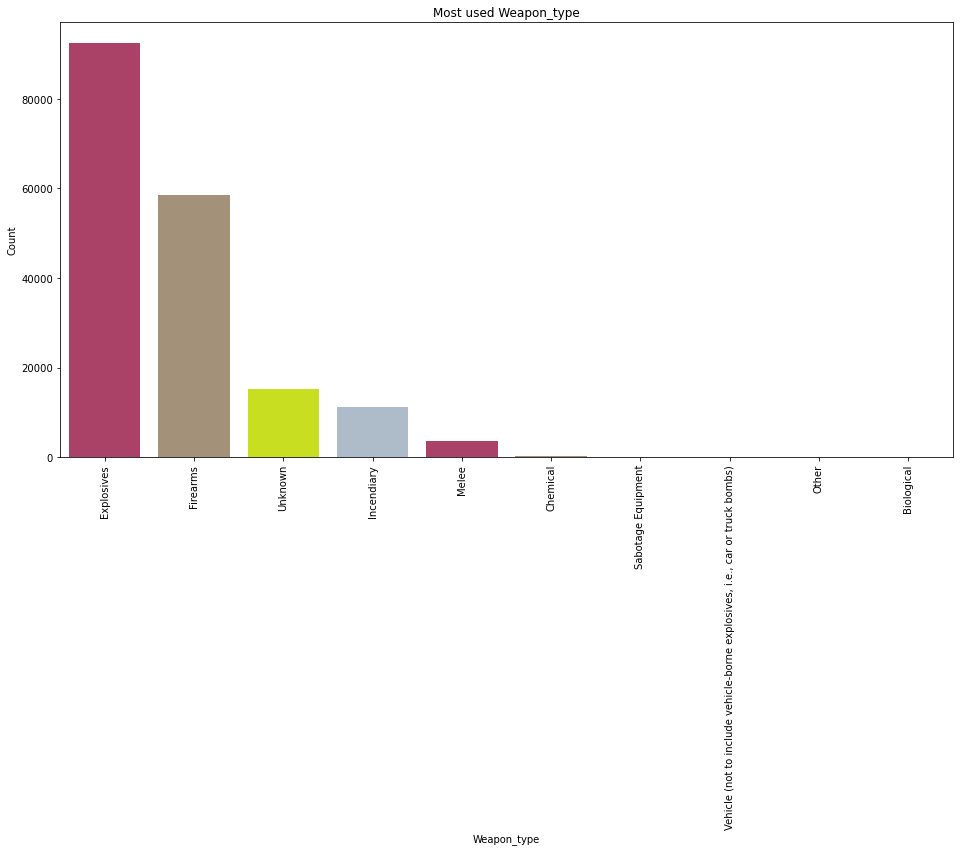

In [20]:
# Visualizing the Weapon types
plt.figure(figsize = (16,8))
sns.barplot(data['Weapon_type'].value_counts()[:10].index,data['Weapon_type'].value_counts()[:10].values,palette=["#bb3163","#aa9272", "#DFFF00",'#aabbcd'])
plt.title('Most used Weapon_type')
plt.xlabel('Weapon_type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### Weapons used in most of the attacks were either explosive or firearms.

In [24]:
# Most Popular Weapon Type/Kind used
data.AttackType.value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

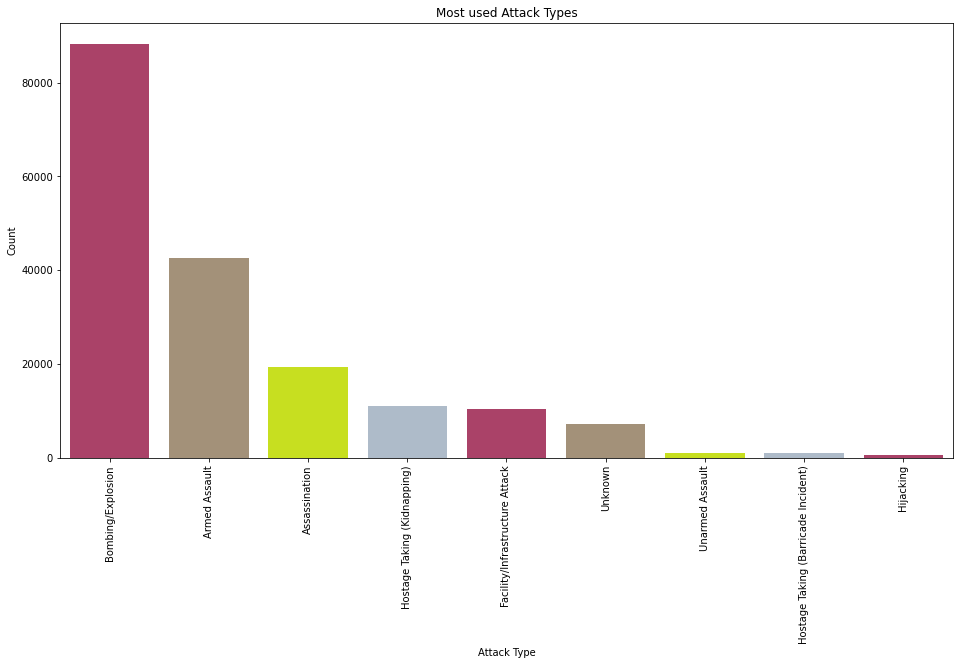

In [23]:
# Visualizing the Attack types
plt.figure(figsize = (16,8))
sns.barplot(data['AttackType'].value_counts()[:10].index,data['AttackType'].value_counts()[:10].values,palette=["#bb3163","#aa9272", "#DFFF00",'#aabbcd'])
plt.title('Most used Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### In most of the attacks Bombing/Explosion was the type of primary attack type.


## Thankyou